In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.7.0'

In [3]:
keras.__version__

'2.7.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [10]:
X_train.shape

(55000, 28, 28)

In [11]:
class_names = ["T-shirt/ top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
y_train[0]

4

In [13]:
class_names[y_train[0]]

'Coat'

In [14]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

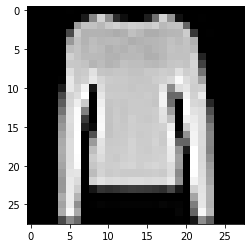

'Pullover'

In [23]:
arg = 50
plt.imshow(X_train[arg], cmap="gray")
plt.show()
class_names[y_train[arg]]

Training a sequential model using keras

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
# same as obove code
# model = keras.models.Sequential([keras.layers.Flatten( input_shape =[ 28, 28]), 
#                                  keras.layers.Dense( 300, activation =" relu"), 
#                                  keras.layers.Dense( 100, activation =" relu"), 
#                                  keras.layers.Dense( 10, activation =" softmax")
#                                 ])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.layers

In [30]:
model.layers[2].name

'dense_1'

In [31]:
model.get_layer("dense_1")

In [32]:
hidden1 = model.layers[1]

In [33]:
weights, biase = hidden1.get_weights()

In [34]:
weights.shape

(784, 300)

In [35]:
weights

array([[ 0.04592048,  0.05825417, -0.02200124, ...,  0.0457052 ,
         0.07135387, -0.02649422],
       [ 0.03100885, -0.00678283,  0.01582135, ..., -0.05781379,
         0.06578465,  0.04959486],
       [-0.07027292, -0.04643845, -0.0024431 , ...,  0.05464537,
         0.05638133, -0.01263196],
       ...,
       [ 0.06104234, -0.01821578,  0.02651891, ..., -0.0125506 ,
         0.03490114, -0.03569449],
       [ 0.0249797 , -0.01318315, -0.00543376, ..., -0.00163623,
         0.04148043, -0.07359751],
       [ 0.05100965, -0.03570257,  0.05068088, ...,  0.0535605 ,
        -0.01253571, -0.0168936 ]], dtype=float32)

In [38]:
biase.shape

(300,)

In [39]:
biase

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [40]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
             optimizer=keras.optimizers.SGD(), 
             metrics=keras.metrics.sparse_categorical_accuracy)

In [41]:
# same as above
# model.compile(loss="sparse_categorical_crossentropy", 
#              optimizer="sgd", 
#              metrics="accuracy")

In [45]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 17s 8ms/step - loss: 0.7218 - sparse_categorical_accuracy: 0.7687 - val_loss: 0.5337 - val_sparse_categorical_accuracy: 0.8152
Epoch 2/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4885 - sparse_categorical_accuracy: 0.8295 - val_loss: 0.4464 - val_sparse_categorical_accuracy: 0.8440
Epoch 3/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4443 - sparse_categorical_accuracy: 0.8438 - val_loss: 0.4200 - val_sparse_categorical_accuracy: 0.8596
Epoch 4/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4170 - sparse_categorical_accuracy: 0.8523 - val_loss: 0.4009 - val_sparse_categorical_accuracy: 0.8620
Epoch 5/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3962 - sparse_categorical_accuracy: 0.8605 - val_loss: 0.3998 - val_sparse_categorical_accuracy: 0.8638
Epoch 6/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3796 -

In [46]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [48]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

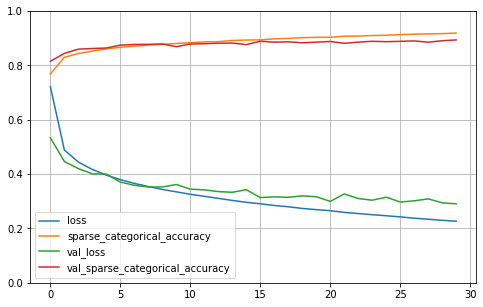

In [53]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True) 
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()

If loss is decressing continuosly at the end of last epoch then still we can train to get more optimizations. Keras runs from where it ended.

If performance of model is not enough then we can do hyperparameter tuning, first to check is learning rate, try another optimizer. If still not good, then try tuning model hyperparameter such as numbers of layers, neurons per layer, activation functions, batch size etc.

In [54]:
history1 = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2235 - sparse_categorical_accuracy: 0.9187 - val_loss: 0.2948 - val_sparse_categorical_accuracy: 0.8928
Epoch 2/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2189 - sparse_categorical_accuracy: 0.9214 - val_loss: 0.3111 - val_sparse_categorical_accuracy: 0.8890
Epoch 3/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2158 - sparse_categorical_accuracy: 0.9221 - val_loss: 0.2855 - val_sparse_categorical_accuracy: 0.8942
Epoch 4/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2137 - sparse_categorical_accuracy: 0.9231 - val_loss: 0.3002 - val_sparse_categorical_accuracy: 0.8890
Epoch 5/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2100 - sparse_categorical_accuracy: 0.9252 - val_loss: 0.2966 - val_sparse_categorical_accuracy: 0.8898


In [55]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3390 - sparse_categorical_accuracy: 0.8798


[0.33896446228027344, 0.879800021648407]

In [59]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [60]:
y_prob.shape

(3, 10)

In [80]:
np.array(class_names)[np.argmax(y_prob, axis=1)]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U13')

In [83]:
np.array(class_names)[y_test[:3]]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U13')

Fortunatly all the predictions get correct